In [ ]:
import os
os.environ["_DEBUG"] = "1"
os.environ["_MULTIPROCESS"] = "0"

# Star notation allows importing type hints for kedro variables (catalog, pipeline, etc)
# along with the register_kedro function.
from pasteur.kedro.ipython import *
from pasteur.utils.styles import use_style

# Import data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add autoreload to allow iterating on your modules
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

# Register your kedro project to access the catalog
register_kedro()
use_style('mlflow')

INFO     Kedro project Pasteur Testing Project                                                                          __init__.py:108
INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'                                        __init__.py:109
INFO     Registered line magic 'run_viz'                                                                                __init__.py:115


In [ ]:
m = catalog.load("mimic_tab_admissions.privbayes.model")

In [ ]:
from itertools import combinations

import networkx as nx

from pasteur.graph.base import to_moral, find_elim_order, elimination_order_greedy
from pasteur.graph.utils import enchanced_display
from pasteur.extras.synth.privbayes import derive_graph_from_nodes

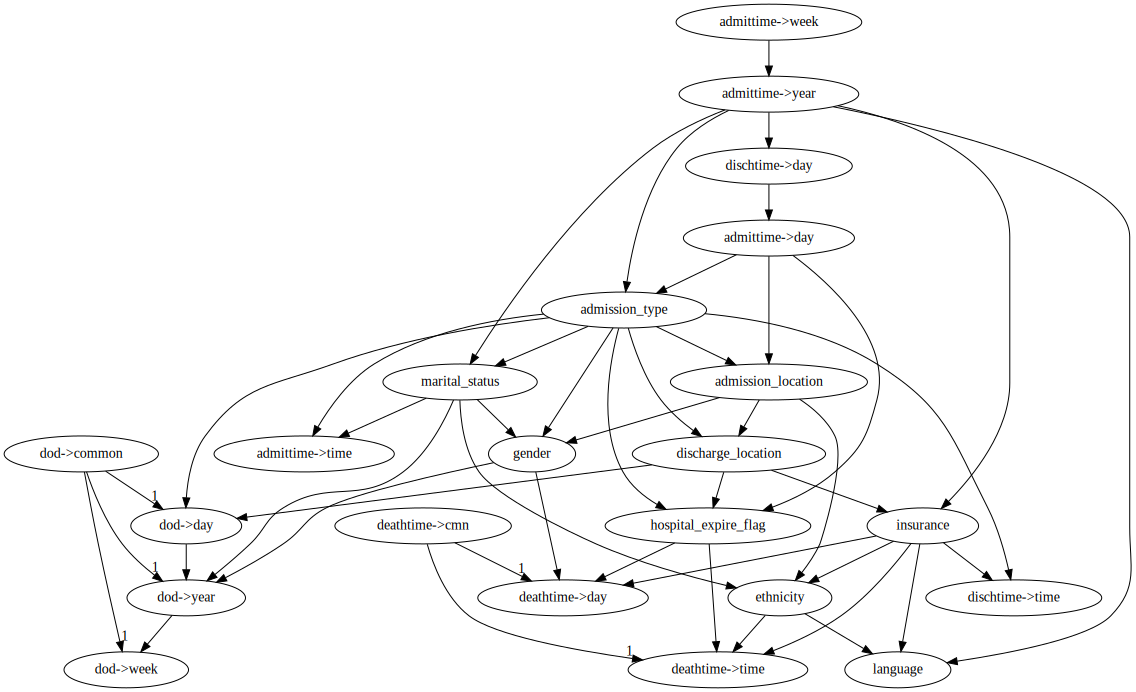

In [ ]:
g = derive_graph_from_nodes(m.nodes, m.table_attrs)

enchanced_display(g)

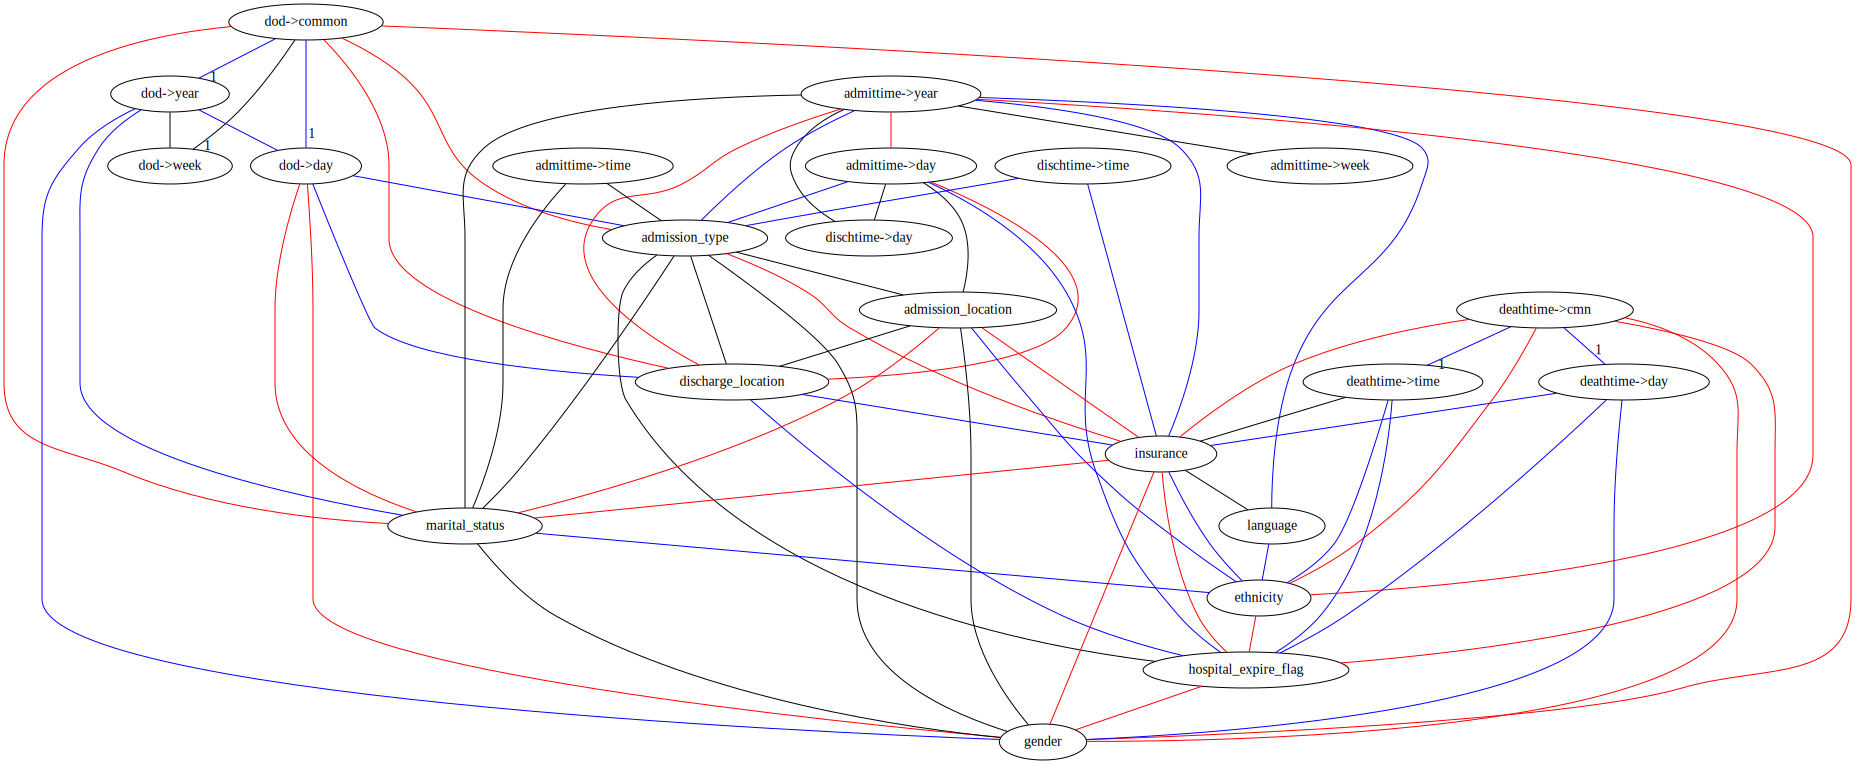

In [ ]:
mg = to_moral(g)
enchanced_display(mg)

In [ ]:
find_elim_order(mg, m.table_attrs, 10)


(
    [
        'language_language',
        'dischtime_dischtime_time',
        'admittime_admittime_time',
        'deathtime_deathtime_day',
        'dod_dod_week',
        'deathtime_deathtime_time',
        'deathtime_deathtime_cmn',
        'admittime_admittime_week',
        'dod_dod_year',
        'dod_dod_day',
        'dod_dod_common',
        'dischtime_dischtime_day',
        'ethnicity_ethnicity',
        'admittime_admittime_day',
        'admittime_admittime_year',
        'admission_location_admission_location',
        'admission_type_admission_type',
        'hospital_expire_flag_hospital_expire_flag',
        'marital_status_marital_status',
        'discharge_location_discharge_location',
        'insurance_insurance',
        'gender_gender'
    ],
    3902319
)

In [ ]:
# %lprun -f elimination_order_greedy elimination_order_greedy(to_moral(g), m.table_attrs)

In [ ]:
%timeit elimination_order_greedy(to_moral(g), m.table_attrs)

22.3 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


INFO     Removing node `dischtime_dischtime_time` with cost: 648                                                            base.py:105


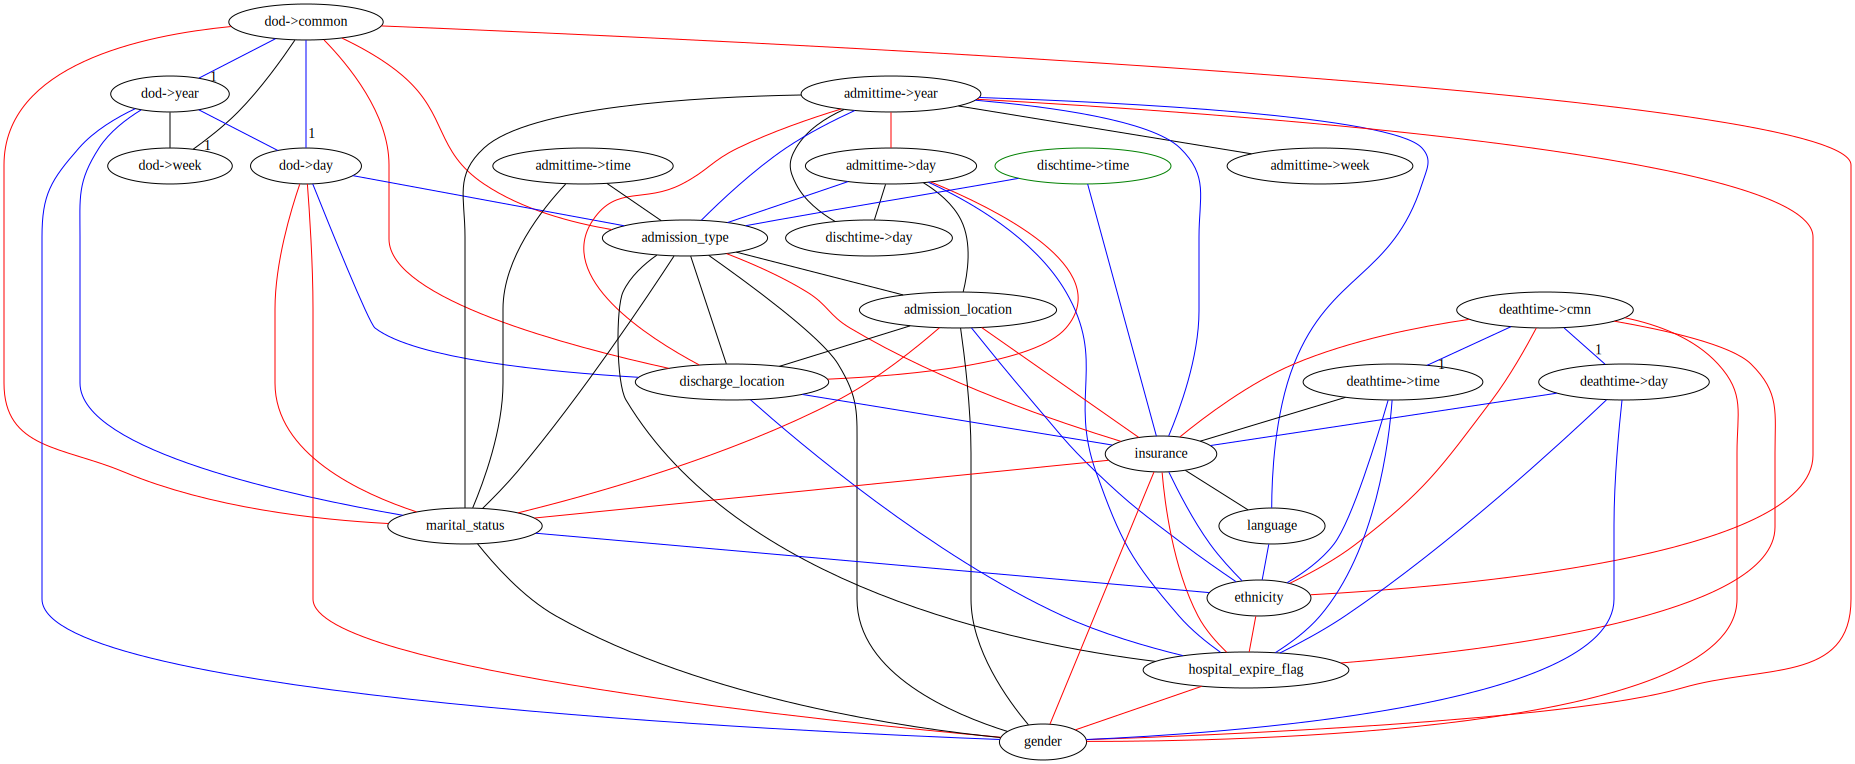

INFO     Removing node `deathtime_deathtime_day` with cost: 780                                                             base.py:105


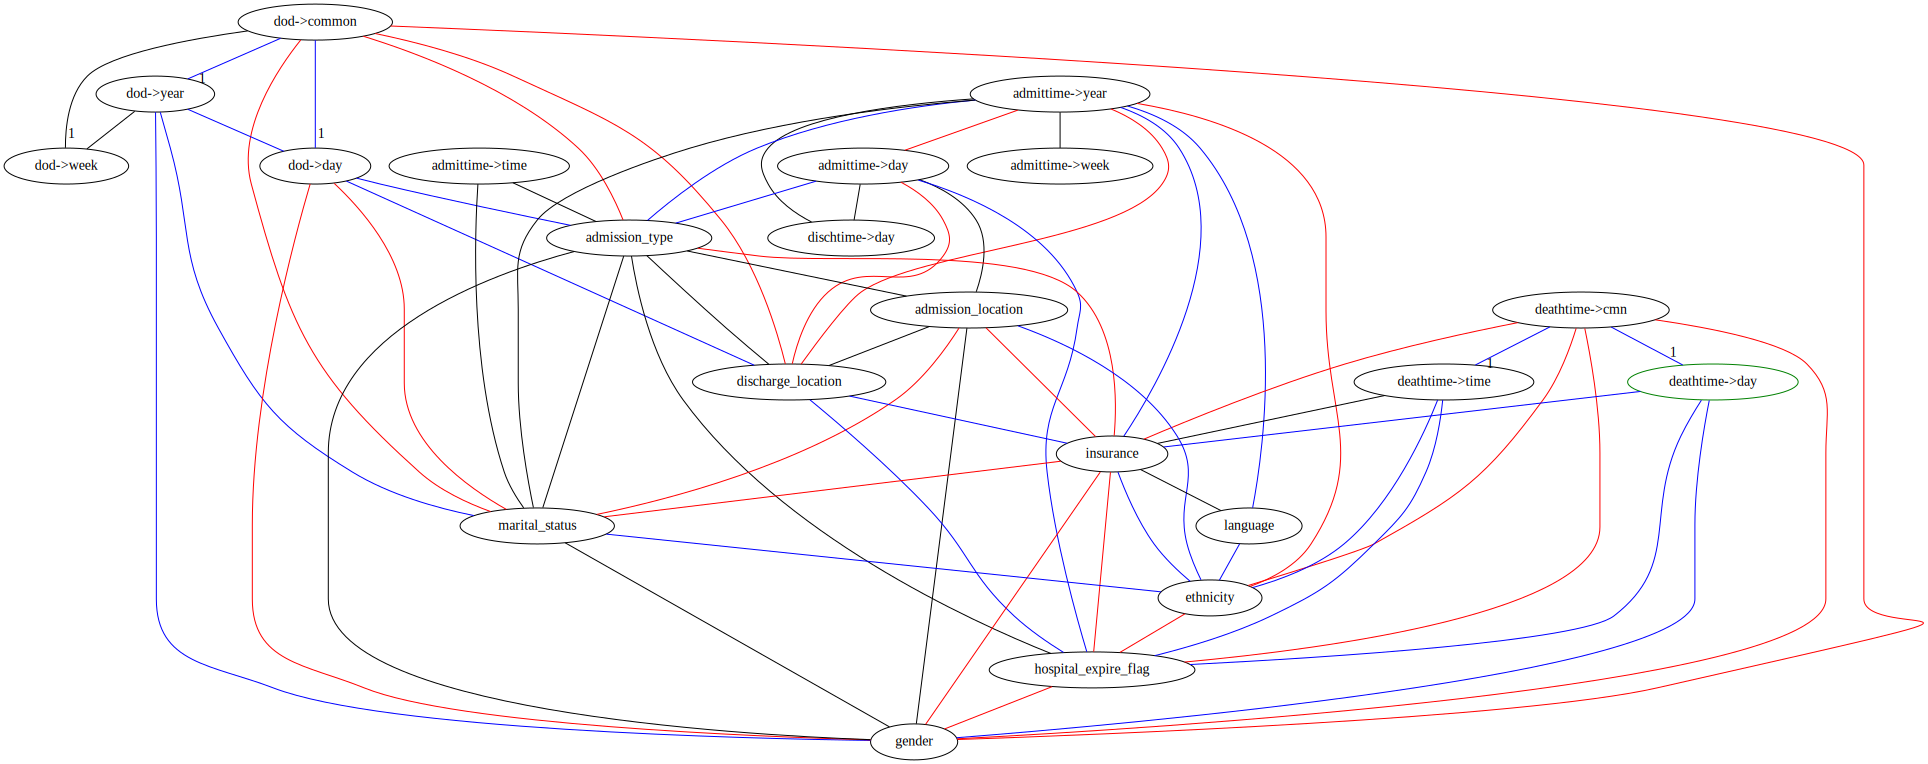

INFO     Removing node `admittime_admittime_time` with cost: 1_080                                                          base.py:105


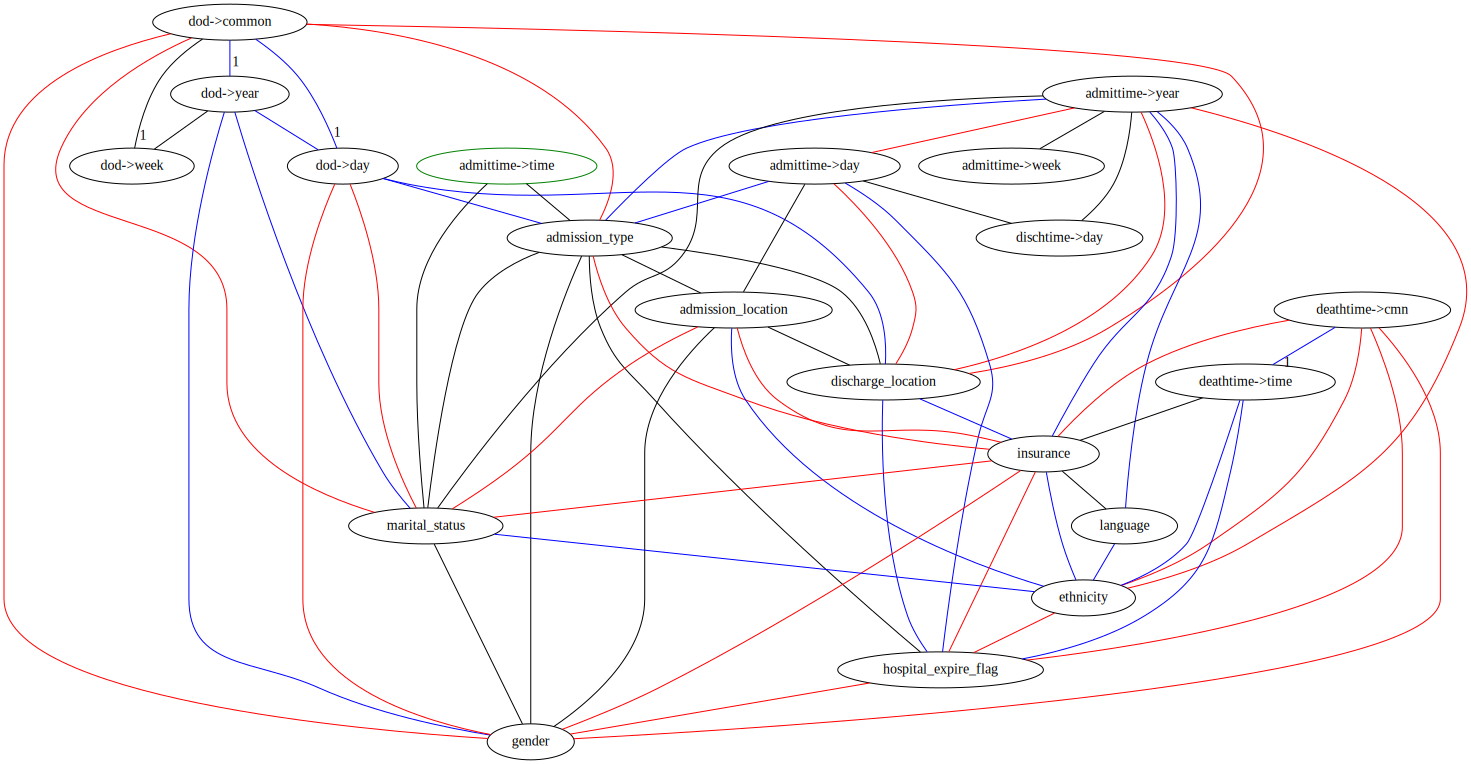

INFO     Removing node `deathtime_deathtime_time` with cost: 1_200                                                          base.py:105


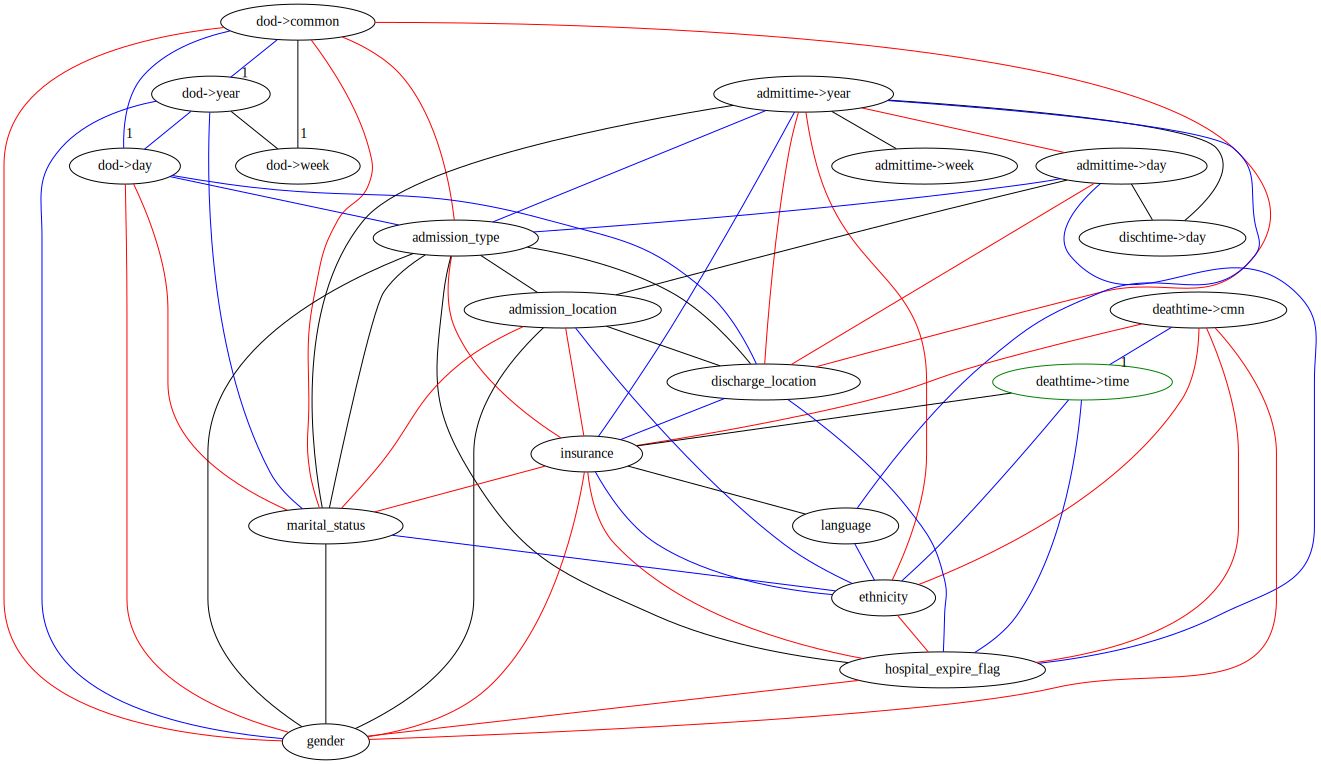

INFO     Removing node `deathtime_deathtime_cmn` with cost: 192                                                             base.py:105


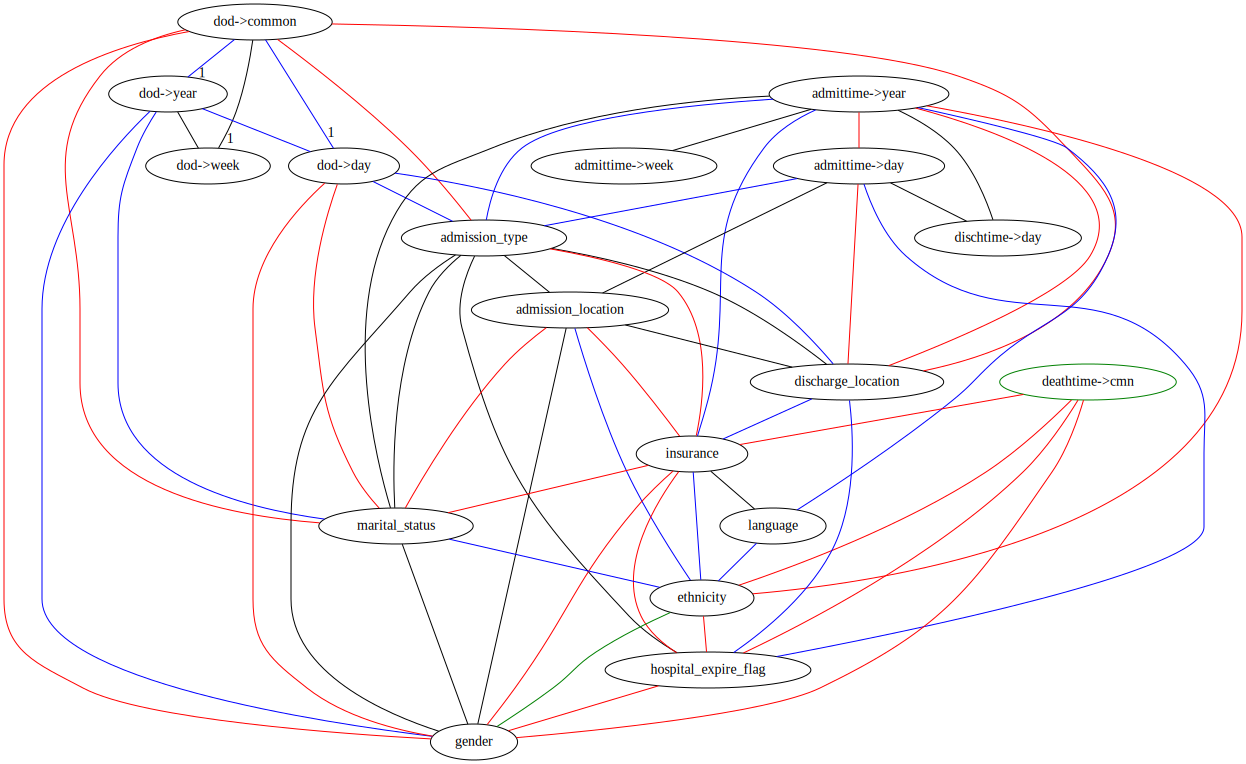

INFO     Removing node `language_language` with cost: 1_536                                                                 base.py:105


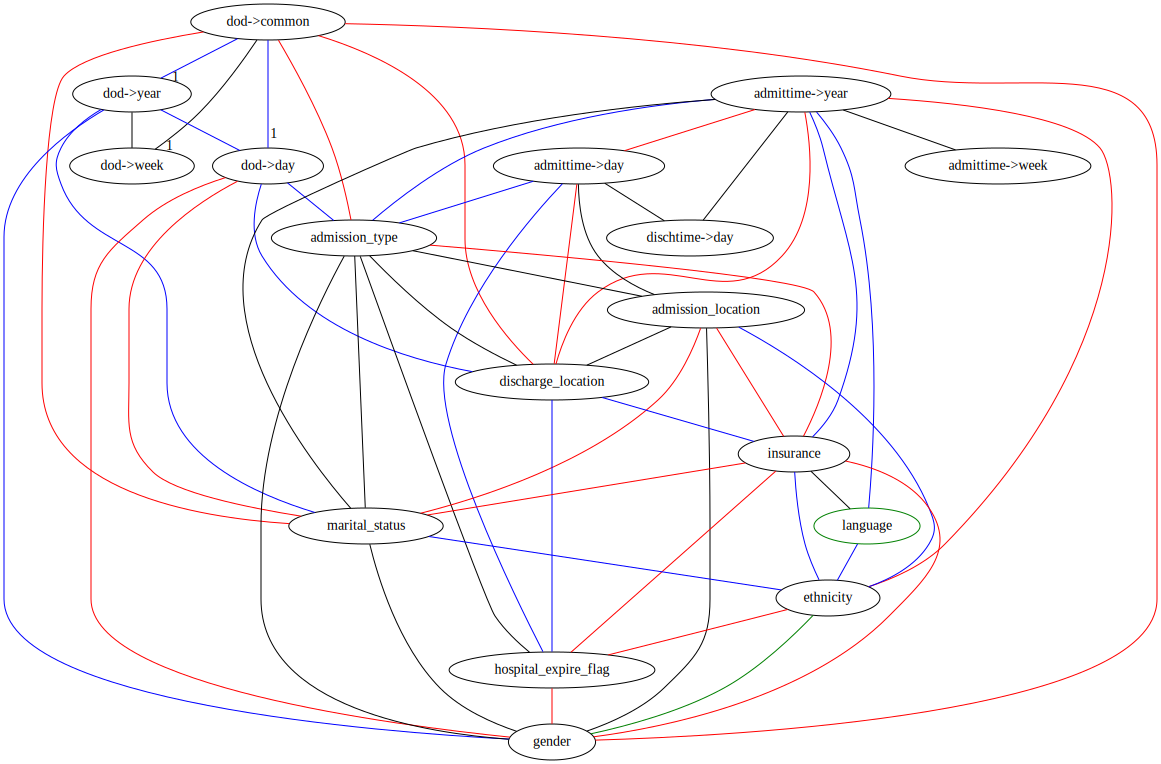

INFO     Removing node `admittime_admittime_week` with cost: 1_664                                                          base.py:105


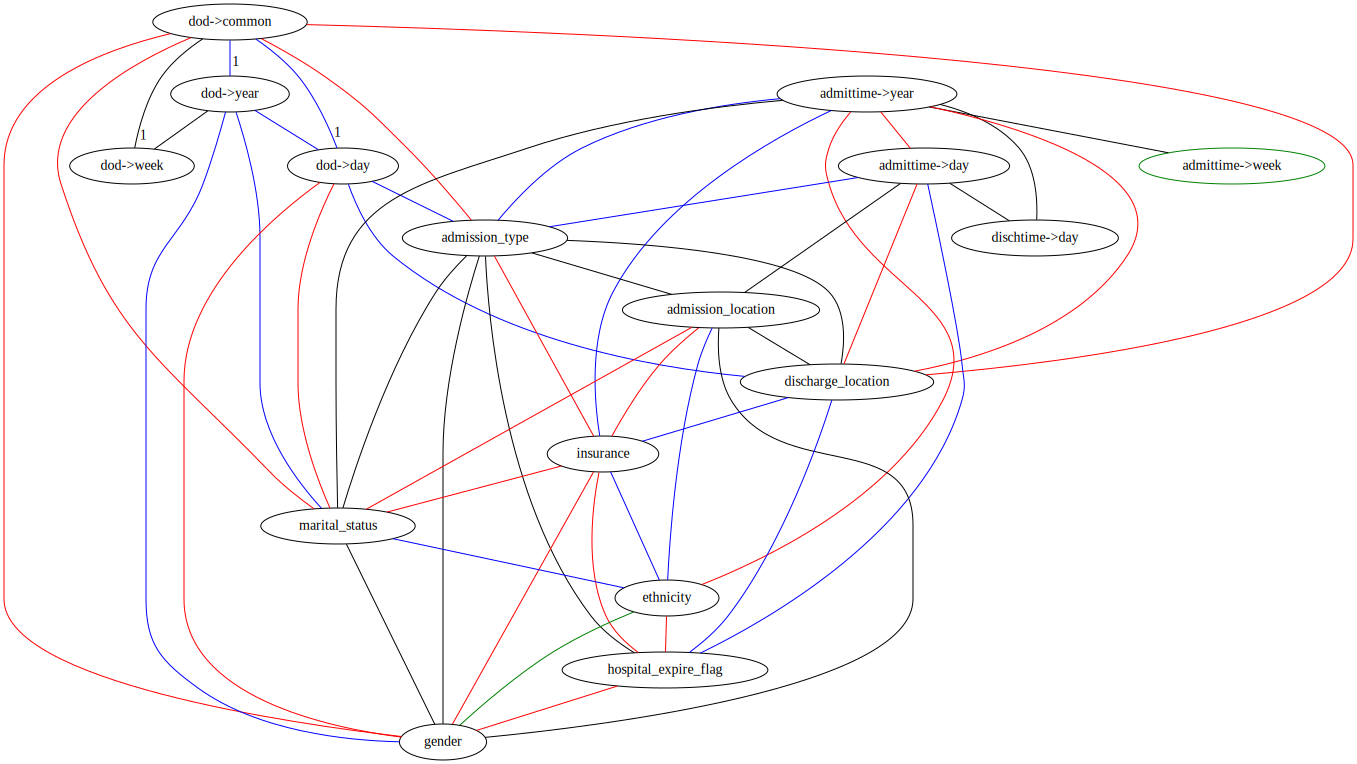

INFO     Removing node `dod_dod_week` with cost: 1_665                                                                      base.py:105


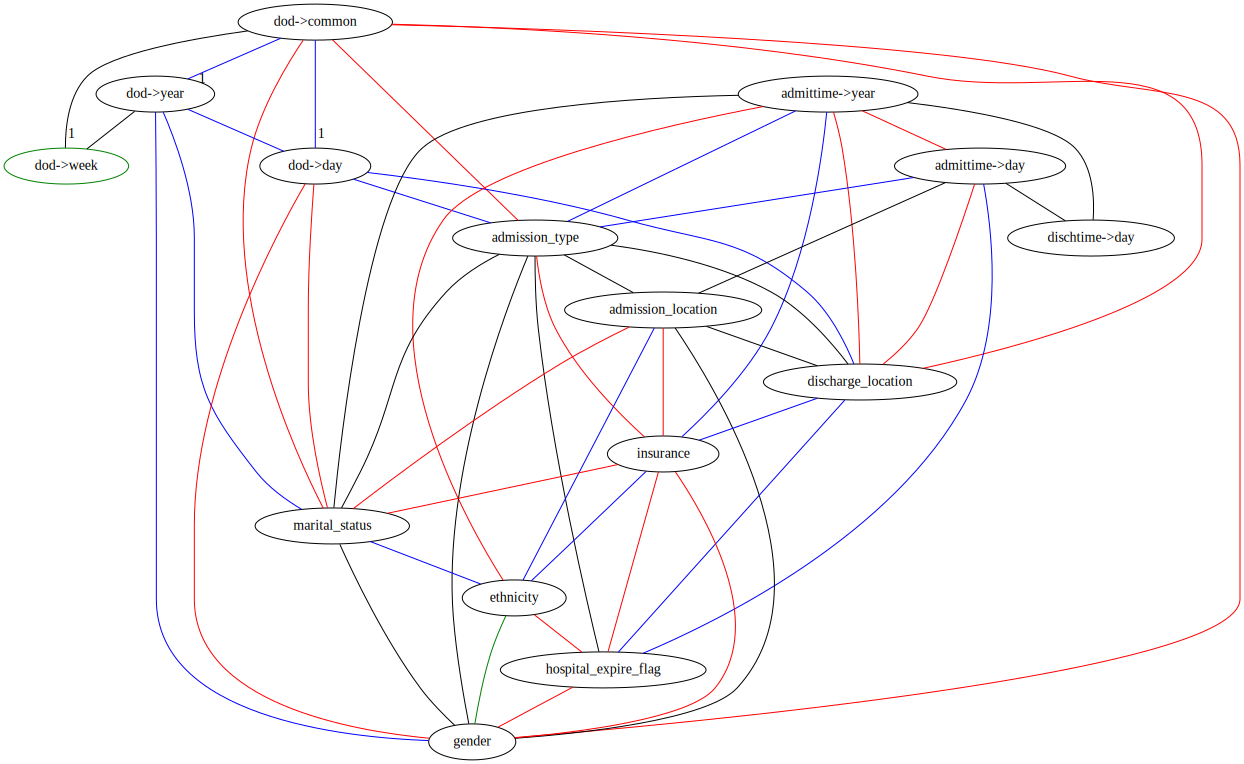

INFO     Removing node `dod_dod_year` with cost: 2_250                                                                      base.py:105


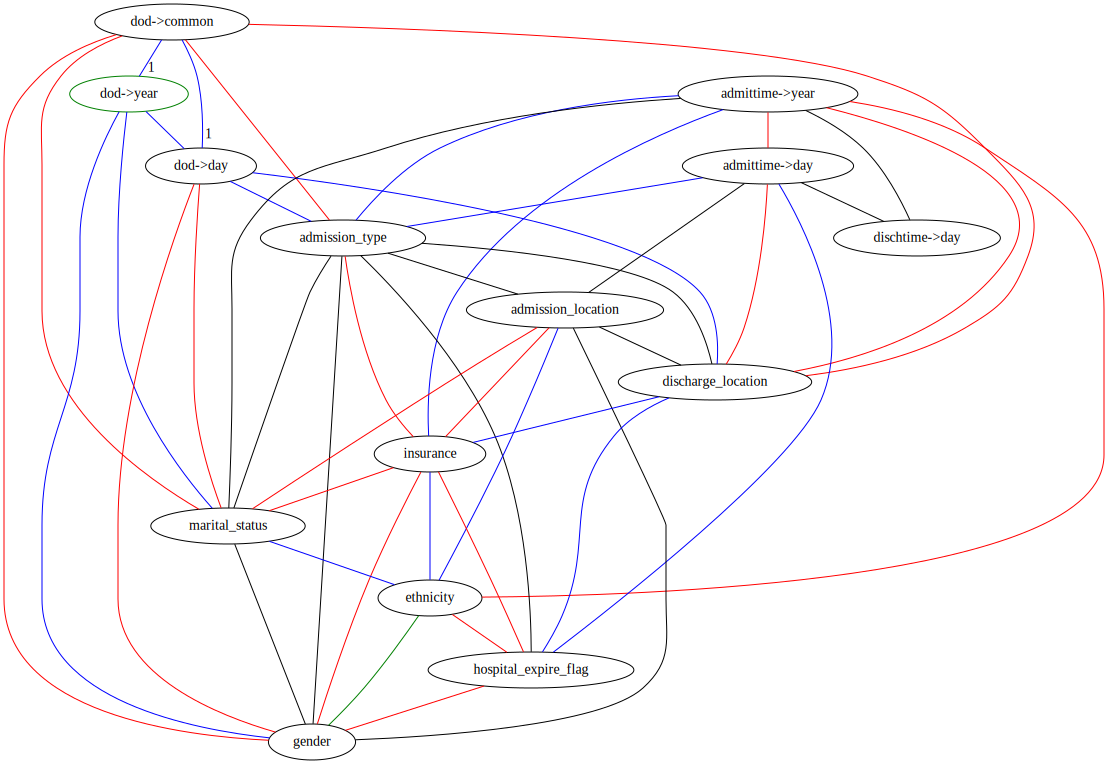

INFO     Removing node `dod_dod_common` with cost: 10_080                                                                   base.py:105


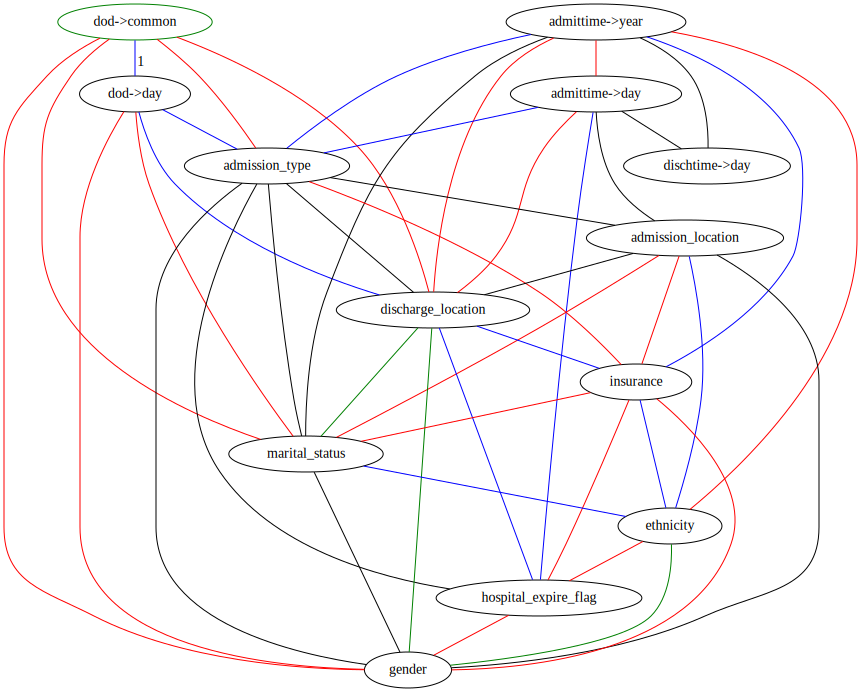

INFO     Removing node `dod_dod_day` with cost: 10_080                                                                      base.py:105


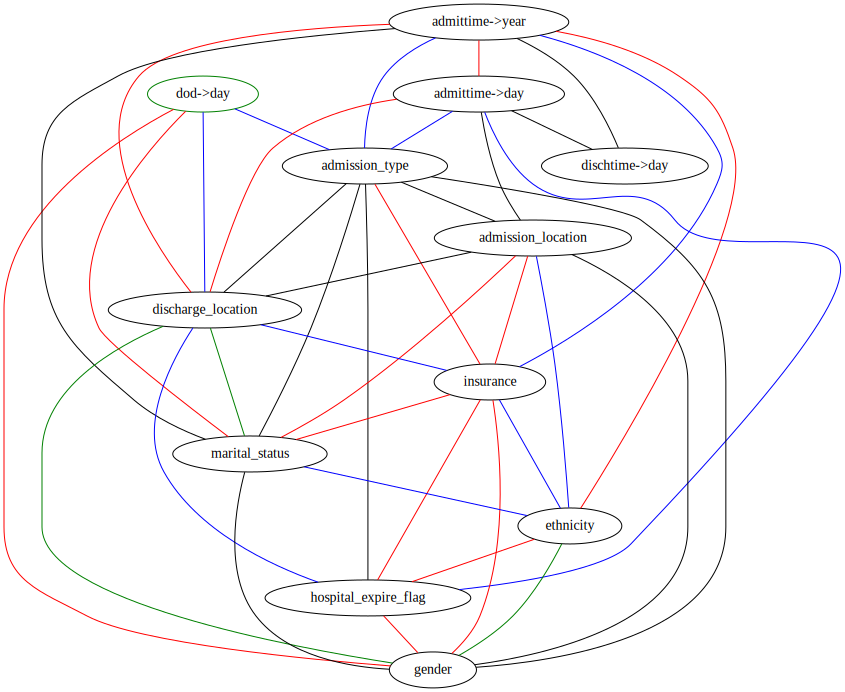

INFO     Removing node `dischtime_dischtime_day` with cost: 14_336                                                          base.py:105


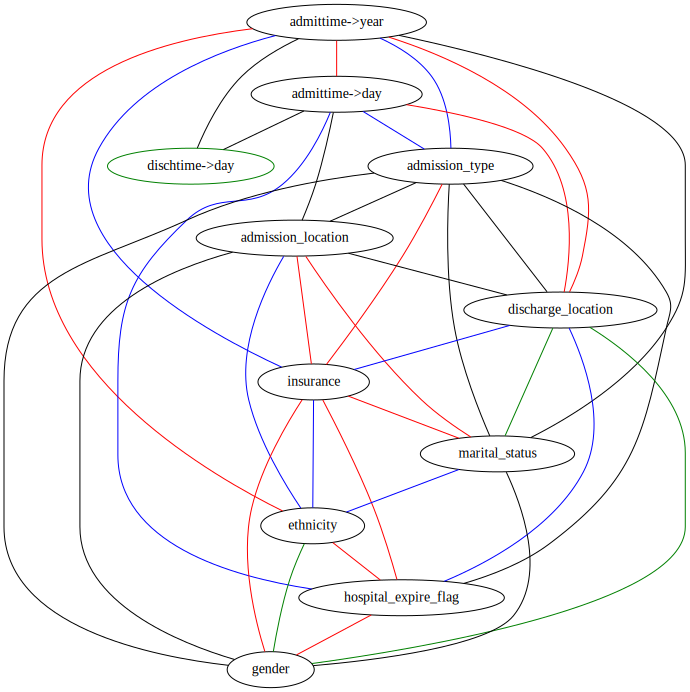

INFO     Removing node `hospital_expire_flag_hospital_expire_flag` with cost: 84_672                                        base.py:105


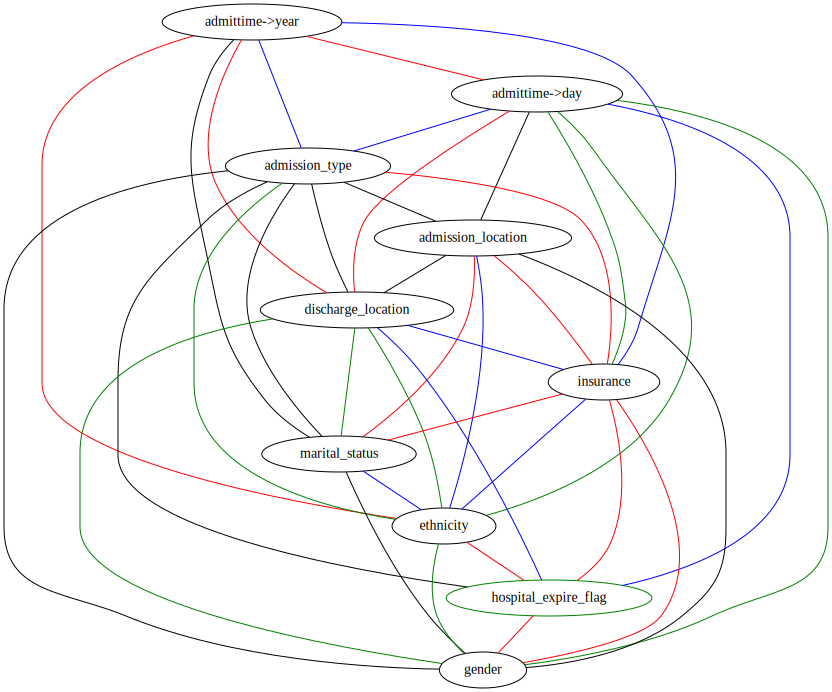

INFO     Removing node `admission_location_admission_location` with cost: 2_540_160                                         base.py:105


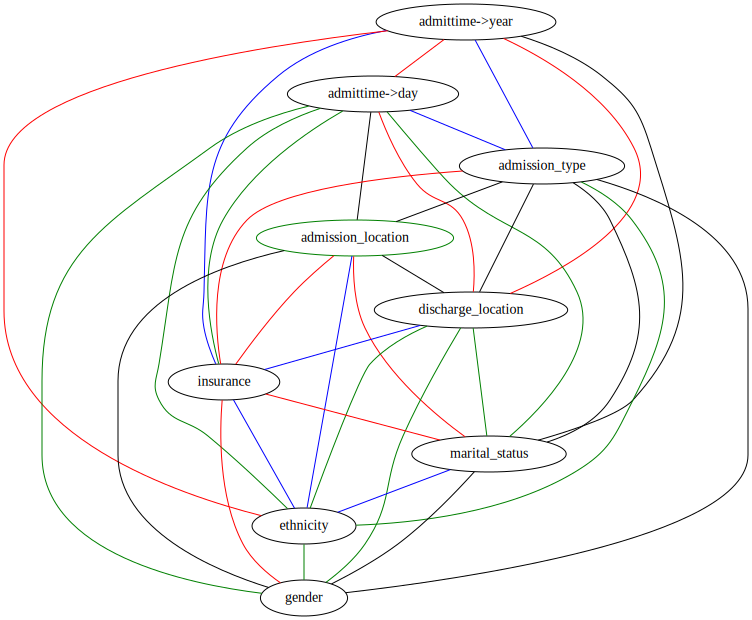

INFO     Removing node `gender_gender` with cost: 211_680                                                                   base.py:105


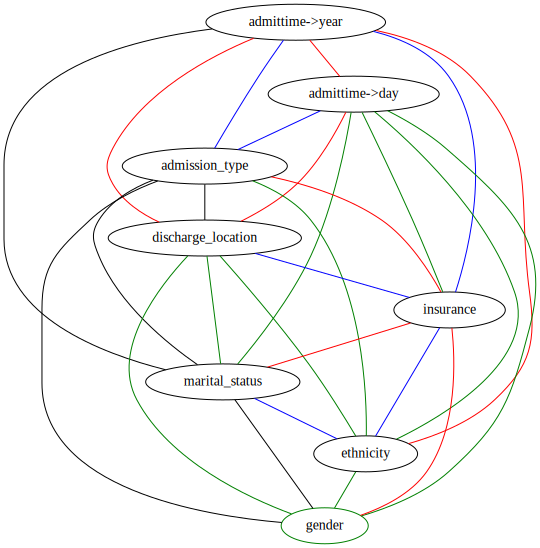

INFO     Removing node `admittime_admittime_year` with cost: 3_386_880                                                      base.py:105


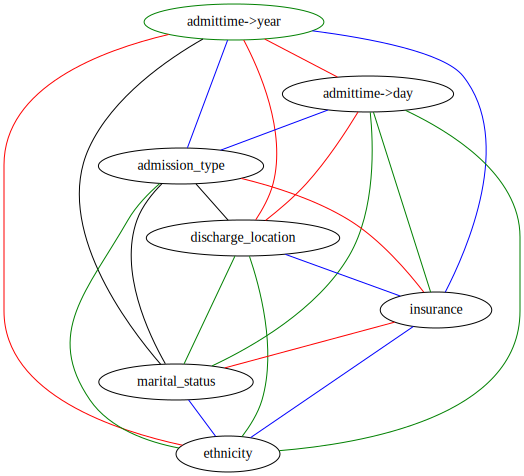

INFO     Removing node `admittime_admittime_day` with cost: 105_840                                                         base.py:105


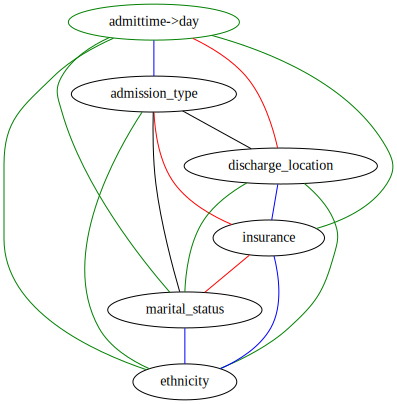

INFO     Removing node `admission_type_admission_type` with cost: 15_120                                                    base.py:105


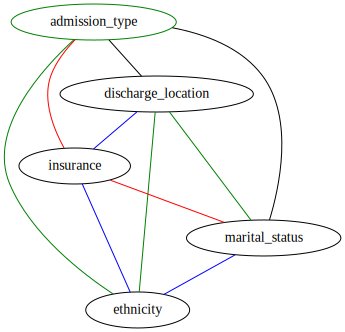

INFO     Removing node `discharge_location_discharge_location` with cost: 1_680                                             base.py:105


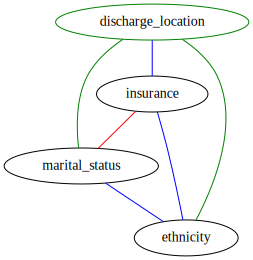

INFO     Removing node `insurance_insurance` with cost: 120                                                                 base.py:105


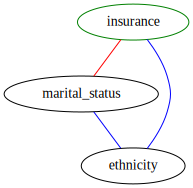

INFO     Removing node `marital_status_marital_status` with cost: 40                                                        base.py:105


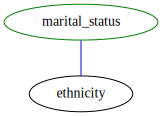

INFO     Removing node `ethnicity_ethnicity` with cost: 8                                                                   base.py:105


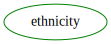

INFO     Final cordal graph with cost 6391711:                                                                              base.py:112


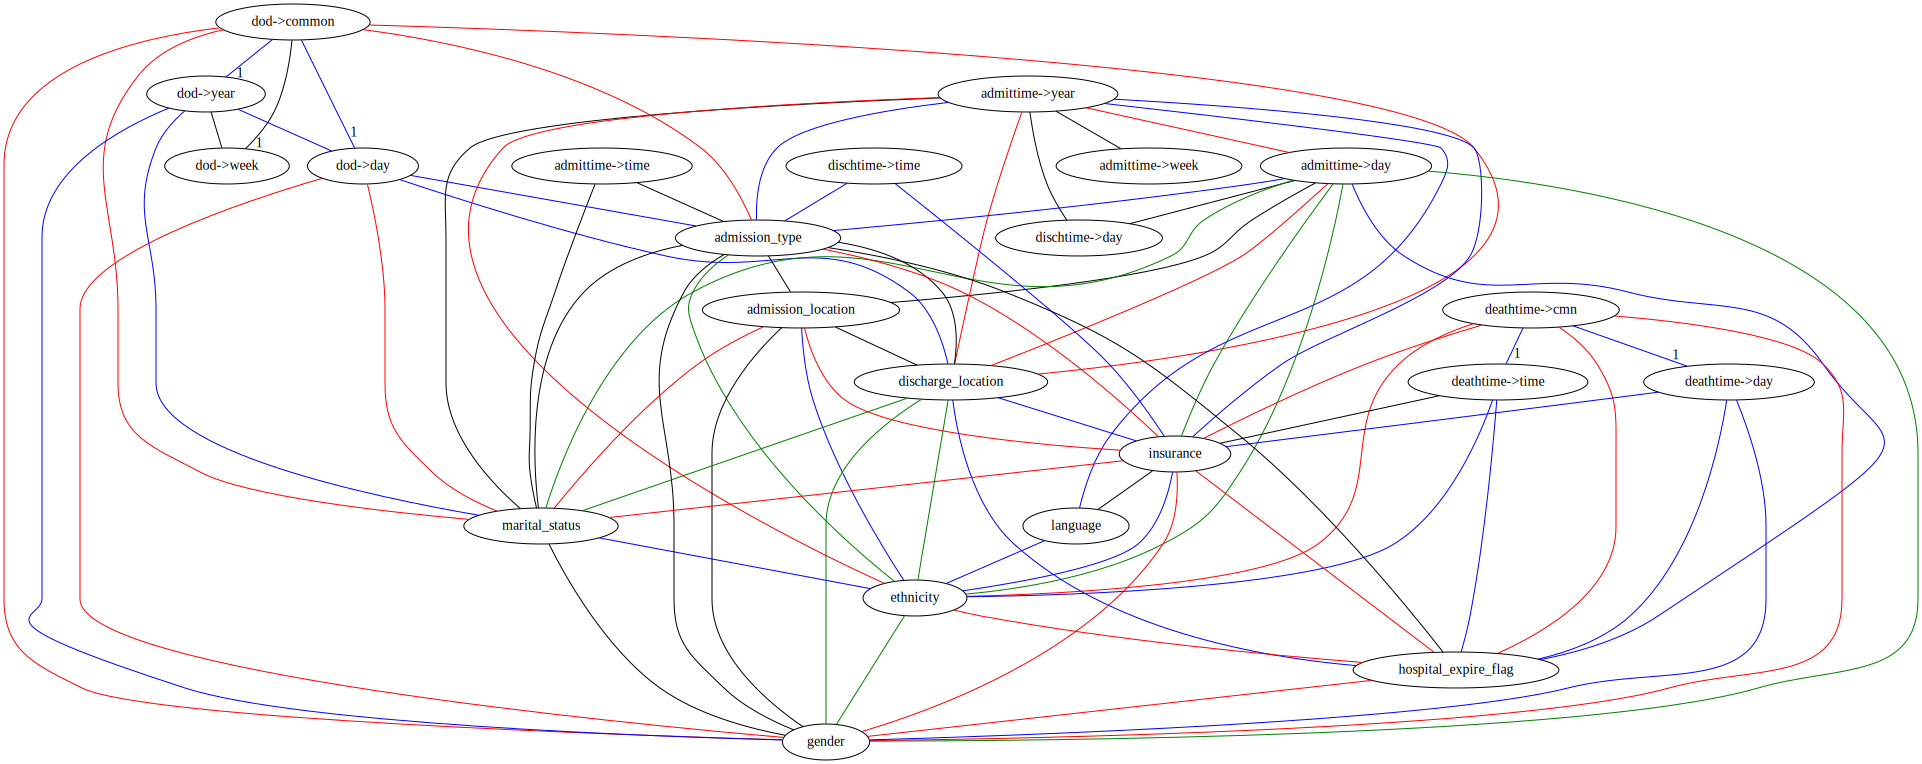

INFO     Elimination order:                                                                                                 base.py:114
         ['dischtime_dischtime_time', 'deathtime_deathtime_day', 'admittime_admittime_time', 'deathtime_deathtime_time',               
         'deathtime_deathtime_cmn', 'language_language', 'admittime_admittime_week', 'dod_dod_week', 'dod_dod_year',                   
         'dod_dod_common', 'dod_dod_day', 'dischtime_dischtime_day', 'hospital_expire_flag_hospital_expire_flag',                      
         'admission_location_admission_location', 'gender_gender', 'admittime_admittime_year', 'admittime_admittime_day',              
         'admission_type_admission_type', 'discharge_location_discharge_location', 'insurance_insurance',                              
         'marital_status_marital_status', 'ethnicity_ethnicity']                                                                       



(
    [
        'dischtime_dischtime_time',
        'deathtime_deathtime_day',
        'admittime_admittime_time',
        'deathtime_deathtime_time',
        'deathtime_deathtime_cmn',
        'language_language',
        'admittime_admittime_week',
        'dod_dod_week',
        'dod_dod_year',
        'dod_dod_common',
        'dod_dod_day',
        'dischtime_dischtime_day',
        'hospital_expire_flag_hospital_expire_flag',
        'admission_location_admission_location',
        'gender_gender',
        'admittime_admittime_year',
        'admittime_admittime_day',
        'admission_type_admission_type',
        'discharge_location_discharge_location',
        'insurance_insurance',
        'marital_status_marital_status',
        'ethnicity_ethnicity'
    ],
    6391711
)

In [ ]:
elimination_order_greedy(to_moral(g), m.table_attrs, display=True)